# Filtros en el Dominio de la Frecuencia

**Dominio Espacial.** Sea $A \in {\rm I\!R}^{m \times n}$ una imagen a escala de grises, el valor de cada pixel $A_{i,j}$, $i \in \{1, \ldots, m\}$, $j \in \{1, \ldots, n\}$, tiene un valor de intensidad en la escala de grises, y diremos que se encuentran en un dominio de valores llamado Dominio Espacial.

Las técnicas vistas hasta el momento en el curso trabajan en el dominio espacial. En esta parte del curso, trabajaremos con diferentes métodos que se utilizan en otro tipo de dominio.

**Pasos para trabajar en otro dominio.** Sea $f(x,y)=A_{x,y}$, donde $A \in {\rm I\!R}^{m \times n}$

![title](media/pasos-para-trabajar-en-otro-dominio.png)

## Transformada Discreta de Fourier de 2D (DFT-2D)

Sea $A \in {\rm I\!R}^{m \times n}$, entonces la DFT-2D de la matriz $A$, es la matriz $F \in \mathbb{C}^{m \times n}$, tal que 

\begin{equation}
F_{u, v} = \sum_{x=0}^{m-1} \sum_{y=0}^{n-1} A_{x+1,y+1} \cdot exp\left(-j2 \pi \left(\dfrac{ux}{m} + \dfrac{vy}{n}\right)\right)
\end{equation}

donde $j = \sqrt{-1}$, y además $u = 1, \ldots, n$; $v = 1, \ldots, n$.

t1 =  2.2128
t2 =  0.079377


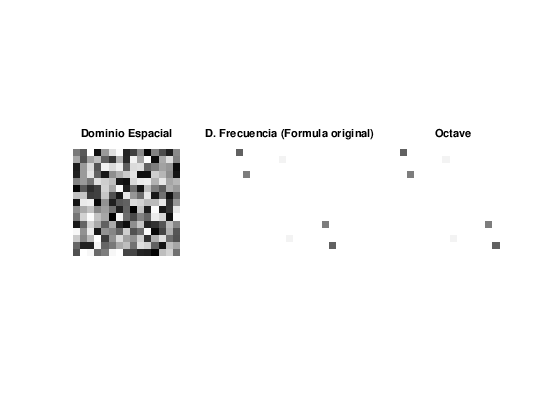

In [1]:
clc; clear;
close all; % Cierra todas las figuras que estan abiertas

m = 15; n = 15;
A = rand(m, n);
subplot(1, 3, 1);
imshow(A);
title('Dominio Espacial');

tic
% Implementacion de la DFT-2D, usando la formula original
F = zeros(m, n);
for u = 1:m % Filas de F
  for v = 1:n % Columnas de F
    for x = 0:m-1
      for y = 0:n-1
        F(u, v) = F(u,v)+A(x+1,y+1)*exp(-1i*2*pi*(u*x/m+v*y/n));
      endfor
    endfor
  endfor
endfor
t1 = toc

subplot(1, 3, 2);
imshow(abs(F));
title('D. Frecuencia (Formula original)')

% Implementacion de la DFT-2D, usando el comando de Octave
tic
Aux = fft2(A);
F1 = [];
for j = 1:m
  F1(j, :) = flip(Aux(m-j+1, :)'); % Hacer un flip y calcular el conjugado
endfor  
t2 = toc
subplot(1, 3, 3);
imshow(abs(F1));
title('Octave');

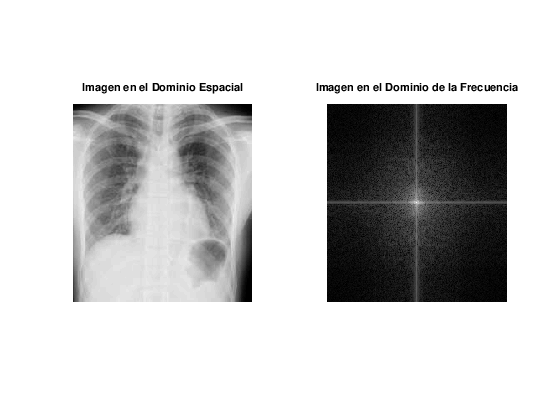

In [2]:
clc; clear;
close all;
X = imread('media/chest.jpg');
% Sugerencia, cuando trabajemos en el dominio de la frecuencia.
% entonces transformaremos la imagen de formato 8 bits a una en
% formato double, con valores entre 0 y 1
X = im2double(X);
subplot(1, 2, 1);
imshow(X);
title('Imagen en el Dominio Espacial');

% Calcular la DFT-2D de la imagen
[m, n] = size(X);
Aux = fft2(X);
F = [];
for j = 1:m
  F(j, :) = flip(Aux(m-j+1, :)'); % Hacer un flip y calcular el conjugado
endfor 
F = fftshift(F);
subplot(1, 2, 2);
imshow(log(1+abs(F)), []);
title('Imagen en el Dominio de la Frecuencia');

## Inversa de la DFT-2D

Sea $A \in {\rm I\!R}^{m \times n}$ y $F \in \mathbb{C}^{m \times n}$, donde $F$ es la DFT-2D, entonces la transformada inversa se define:

\begin{equation}
A_{x,y} = \dfrac{1}{m \cdot n} \sum_{u=0}^{m-1} \sum_{v=0}^{n-1} F_{u+1,v+1} \cdot exp\left(j2 \pi \left(\dfrac{ux}{m} + \dfrac{vy}{n}\right)\right)
\end{equation}

**Notación.** $F = \mathscr{F} (A)$ y $A = \mathscr{F}^{-1} (F)$
- $\mathscr{F}$: operador de DFT-2D
- $\mathscr{F}^{-1}$: operador inverso de DFT-2D

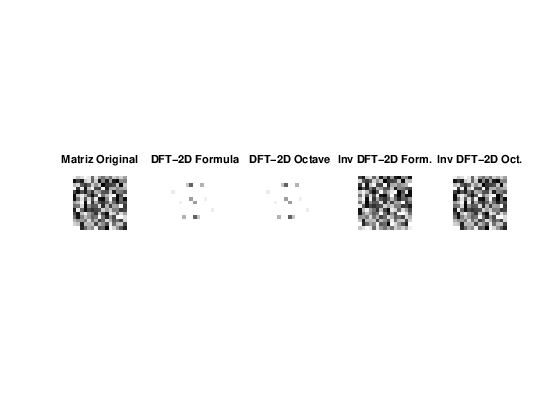

In [3]:
clc; clear; close all;

m = 15; n = 15;
A = rand(m, n);
subplot(1, 5, 1);
imshow(A);
title('Matriz Original');

% Implementacion de la DFT-2D, usando la formula original
F = zeros(m, n);
for u = 1:m % Filas de F
  for v = 1:n % Columnas de F
    for x = 0:m-1
      for y = 0:n-1
        F(u, v) = F(u,v)+A(x+1,y+1)*exp(-1i*2*pi*(u*x/m+v*y/n));
      endfor
    endfor
  endfor
endfor
subplot(1, 5, 2);
imshow(abs(F));
title('DFT-2D Formula')

% Calculo de la DFT-2D de A con el metodo de Octave
Aux = fft2(A);
F = [];
for j = 1:m
  F(j, :) = flip(Aux(m-j+1, :)'); % Hacer un flip y calcular el conjugado
endfor  
subplot(1, 5, 3);
imshow(abs(F));
title('DFT-2D Octave');

% Calculo de la Inversa de DFT-2D con la Formula
A1 = zeros(m, n);
for x = 1:m % Filas de F
  for y = 1:n % Columnas de F
    for u = 0:m-1
      for v = 0:n-1
        A1(x,y) = A1(x,y)+F(u+1,v+1)*exp(1i*2*pi*(u*x/m+v*y/n));
      endfor  
    endfor  
  endfor  
endfor
A1 = abs(1/(m*n) * A1);
subplot(1, 5, 4);
imshow(A1);
title('Inv DFT-2D Form.')

% Calculo de la Inversa de DFT-2D con el metodo de Octave
A2 = abs(ifft2(F));
subplot(1, 5, 5);
imshow(A2);
title('Inv DFT-2D Oct.')



**Nota.** Sea $x = x_r + i x_i$ un número complejo.
- Amplitud-Magnitud

\begin{equation}
|x| = \sqrt{x_r^2 + x_i^2}
\end{equation}

- Fase
\begin{equation}
\phi = arctan \left( \dfrac{x_i}{R} \right)
\end{equation}

## Propiedades de la DFT-2D
1) Linealidad: $\mathscr{F}[a \cdot f_1(x, y) + b \cdot f_2(x, y)] = a \cdot \mathscr{F}(f_1(x,y)) + b \cdot \mathscr{F}(f_2(x,y))$

2) Traslación: $\mathscr{F}[f(x-x_0,y-y_0)] = \mathscr{F} (f(x,y)) \cdot exp \left( -j2 \pi \left( \dfrac{u \cdot x_0}{m} + \dfrac{v \cdot y_0}{n} \right) \right)$

3) Periodicidad: Sea $F \in \mathbb{C}^{m \times n}$ la DFT-2D de $A \in {\rm I\!R}^{m \times n}$. Entonces $F_{u,v}=F_{u+m,v+n}$.